In [1]:
import os
os.environ['DISABLE_V2_BEHAVIOR'] = '1'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import ktrain
from ktrain import text as txt

Instructions for updating:
non-resource variables are not supported in the long term
Using DISABLE_V2_BEHAVIOR with TensorFlow


In [6]:
# load data
(trn, val, preproc) = txt.entities_from_txt('data/DATA_ANNOTATED.csv',
                                            sentence_column='Sentence',
                                            word_column='Word',
                                            tag_column='Tag', 
                                            data_format='gmb',
                                            use_char=True)

detected encoding: utf-8 (if wrong, set manually)
Number of sentences:  28834
Number of words in the dataset:  63950
Tags: ['I-EVENT', 'B-TIME', 'B-LOC', 'I-ORG', 'O', 'I-MONEY', 'I-PERCENT', 'B-WORK_OF_ART', 'B-NORP', 'B-PERCENT', 'B-CARDINAL', 'I-NORP', 'B-LAW', 'B-PRODUCT', 'I-DATE', 'B-LANGUAGE', 'I-LOC', 'B-EVENT', 'I-WORK_OF_ART', 'B-PER', 'I-TIME', 'I-PRODUCT', 'I-PER', 'B-QUANTITY', 'B-ORG', 'I-QUANTITY', 'B-ORDINAL', 'B-DATE', 'B-MONEY', 'I-LAW', 'I-CARDINAL']
Number of Labels:  31
Longest sentence: 74 words


In [7]:
model = txt.sequence_tagger('bilstm-crf', preproc)

Embedding schemes employed (combined with concatenation):
	word embeddings initialized randomly
	character embeddings



In [8]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
810/810 [==============================] - 234s 283ms/step - batch: 404.5000 - size: 31.9975 - loss: 8.2701
Epoch 2/2
810/810 [==============================] - 210s 259ms/step - batch: 369.5000 - size: 31.9973 - loss: 12.6498


done.
Visually inspect loss plot and select learning rate associated with falling loss


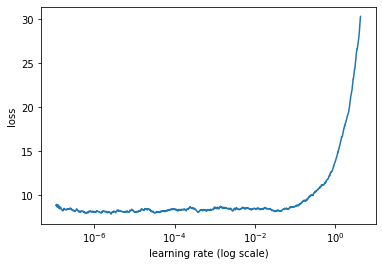

In [16]:
learner.lr_find(show_plot=True, max_epochs=2)

In [9]:
history = learner.fit(lr=1e-3, n_cycles=2, cycle_len=3) 

preparing training data ...done.
preparing validation data ...done.
Epoch 1/6
811/811 [==============================] - 248s 298ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.7916 - val_loss: 8.4679
Epoch 2/6
811/811 [==============================] - 244s 301ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.4437 - val_loss: 8.3904
Epoch 3/6
811/811 [==============================] - 239s 294ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.3789 - val_loss: 8.3847
Epoch 4/6
811/811 [==============================] - 243s 300ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.3624 - val_loss: 8.3501
Epoch 5/6
811/811 [==============================] - 242s 298ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.3001 - val_loss: 8.3392
Epoch 6/6
811/811 [==============================] - 238s 293ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.2717 - val_loss: 8.3420


In [10]:
learner.validate(class_names=preproc.get_classes())

   F1:  66.47
              precision    recall  f1-score   support

    CARDINAL       0.65      0.79      0.71       511
        DATE       0.72      0.75      0.73       844
       EVENT       0.43      0.36      0.39       110
    LANGUAGE       0.00      0.00      0.00         2
         LAW       0.00      0.00      0.00         7
         LOC       0.76      0.76      0.76      1270
       MONEY       0.00      0.00      0.00        10
        NORP       0.80      0.75      0.77       135
     ORDINAL       0.89      0.91      0.90       175
         ORG       0.52      0.47      0.49       735
         PER       0.66      0.62      0.64      1537
     PERCENT       0.00      0.00      0.00         1
     PRODUCT       0.12      0.02      0.03        64
    QUANTITY       0.49      0.39      0.43        57
        TIME       0.73      0.67      0.70       322
 WORK_OF_ART       0.11      0.03      0.05       139

   micro avg       0.68      0.65      0.66      5919
   macro avg

0.6646536105599172

### Prevendo novas frases

In [11]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [14]:
predictor.predict('UPDATE from the ground- Photos just in from Marsh Harbour, where we set up a water station at a local primary school. Marsh Harbour experienced the full force of # Hurricane Dorian, & we use @katadyn reverse osmosis water treatment systems to  purify salt water into drinking water.')

[('UPDATE', 'O'),
 ('from', 'O'),
 ('the', 'O'),
 ('ground', 'O'),
 ('-', 'O'),
 ('Photos', 'O'),
 ('just', 'O'),
 ('in', 'O'),
 ('from', 'O'),
 ('Marsh', 'B-LOC'),
 ('Harbour', 'I-LOC'),
 (',', 'O'),
 ('where', 'O'),
 ('we', 'O'),
 ('set', 'O'),
 ('up', 'O'),
 ('a', 'O'),
 ('water', 'O'),
 ('station', 'O'),
 ('at', 'O'),
 ('a', 'O'),
 ('local', 'O'),
 ('primary', 'O'),
 ('school', 'O'),
 ('.', 'O'),
 ('Marsh', 'B-LOC'),
 ('Harbour', 'I-LOC'),
 ('experienced', 'O'),
 ('the', 'O'),
 ('full', 'O'),
 ('force', 'O'),
 ('of', 'O'),
 ('#', 'O'),
 ('Hurricane', 'B-EVENT'),
 ('Dorian', 'I-EVENT'),
 (',', 'O'),
 ('&', 'O'),
 ('we', 'O'),
 ('use', 'O'),
 ('@', 'O'),
 ('katadyn', 'O'),
 ('reverse', 'O'),
 ('osmosis', 'O'),
 ('water', 'O'),
 ('treatment', 'O'),
 ('systems', 'O'),
 ('to', 'O'),
 ('purify', 'O'),
 ('salt', 'O'),
 ('water', 'O'),
 ('into', 'O'),
 ('drinking', 'O'),
 ('water', 'O'),
 ('.', 'O')]